In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

# Data scaling

In [2]:
frames = []

interpolation_dirs = [1,2,3,4]

for interpolation_dir in interpolation_dirs:
    output_filepath = os.path.join(f'data_scaling/experiment_{interpolation_dir}', 'output.json')
    config_filepath = os.path.join(f'data_scaling/experiment_{interpolation_dir}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['experiment_num'] = interpolation_dir
    frames.append(df)

df = pd.concat(frames)
df = df.groupby('experiment_num').last().reset_index()
case = ['Mean centring', 'Standardise', 'Normalise', 'Unscaled']
df['case']=case
# df

In [3]:
df_val = df[['min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'experiment_num','case']].set_index(['case'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,experiment_num,Prediction time per sample [ms],Time per epoch [s]
case,,,,,,,,,,
Mean centring,4.155801,12.396665,7.606181,0.179250,134.0,10.718322,79.0,1,1.337690,0.135675
Standardise,4.355911,15.380454,8.489679,0.150771,134.0,10.095597,74.0,2,1.125156,0.136427
Normalise,4.879248,16.002713,10.023962,0.151925,134.0,11.504482,86.0,3,1.133768,0.133773
Unscaled,21.365265,30.892900,25.739756,0.150079,134.0,13.531554,102.0,4,1.119996,0.132662


In [4]:
df_val_err = df[['min_l2_error','max_l2_error','mean_l2_error', 'min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod', 'experiment_num','case']].set_index(['case'])
df_val_err[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val_err[['min_l2_error_pod', 'max_l2_error_pod', 'mean_l2_error_pod']] *= 100
df_val_err = df_val_err.fillna('-')

df_val_err = df_val_err.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'min_l2_error_pod':'Min L2 error POD [%]',
    'max_l2_error_pod':'Max L2 error POD [%]',
    'mean_l2_error_pod':'Mean L2 error POD [%]',
})
df_val_err

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Min L2 error POD [%],Max L2 error POD [%],Mean L2 error POD [%],experiment_num
case,,,,,,,
Mean centring,4.155801,12.396665,7.606181,20.475821,32.461318,24.177258,1
Standardise,4.355911,15.380454,8.489679,36.226417,46.089490,41.324178,2
Normalise,4.879248,16.002713,10.023962,75.402748,79.109004,77.401901,3
Unscaled,21.365265,30.892900,25.739756,20.524747,37.802247,28.098021,4


In [6]:
df_latex = df[['case','min_l2_error','max_l2_error','mean_l2_error', 'min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod','total_training_time','total_epochs']]
df_latex[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_latex[['min_l2_error_pod', 'max_l2_error_pod', 'mean_l2_error_pod']] *= 100

val_idx = [key for key in df_latex.columns if key != 'case' and key != 'total_epochs']
for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
        if val_idx_ != 'total_training_time':
            output += f' & {row[val_idx_]:.2f}\%'
        else:
            output += f' & {row[val_idx_]:.2f}'
    output += f' & {row.total_epochs:.0f} \\\\'
    print(output)

Mean centring & 4.16\% & 12.40\% & 7.61\% & 20.48\% & 32.46\% & 24.18\% & 10.72 & 79 \\
Standardise & 4.36\% & 15.38\% & 8.49\% & 36.23\% & 46.09\% & 41.32\% & 10.10 & 74 \\
Normalise & 4.88\% & 16.00\% & 10.02\% & 75.40\% & 79.11\% & 77.40\% & 11.50 & 86 \\
Unscaled & 21.37\% & 30.89\% & 25.74\% & 20.52\% & 37.80\% & 28.10\% & 13.53 & 102 \\


In [7]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]
frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','experiment_num','case']].set_index(['case'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,experiment_num,Prediction time per sample [ms]
case,,,,,,,
Mean centring,"[65.62, 100.58]","[99.62, 156.6]","[91.93, 106.36]","[0.22, 0.22]","[400.0, 400.0]","[1, 1]","[0.54, 0.55]"
Normalise,"[82.07, 100.5]","[100.47, 127.33]","[97.08, 102.49]","[0.22, 0.22]","[400.0, 400.0]","[3, 3]","[0.54, 0.55]"
Standardise,"[70.53, 99.6]","[99.6, 128.35]","[99.37, 102.98]","[0.22, 0.22]","[400.0, 400.0]","[2, 2]","[0.54, 0.55]"
Unscaled,"[65.81, 105.55]","[104.52, 213.97]","[100.91, 125.0]","[0.21, 0.38]","[400.0, 400.0]","[4, 4]","[0.54, 0.94]"


In [8]:
df_latex = df_test_min_max.reset_index()[['case','Min L2 error [%]','Max L2 error [%]','Mean L2 error [%]']]

val_idx = [key for key in df_latex.keys() if key != 'case']

for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
        output += f' & {row[val_idx_][0]:.2f}\% - {row[val_idx_][1]:.2f}\%'
    output += f' \\\\'
    print(output)

Mean centring & 65.62\% - 100.58\% & 99.62\% - 156.60\% & 91.93\% - 106.36\% \\
Normalise & 82.07\% - 100.50\% & 100.47\% - 127.33\% & 97.08\% - 102.49\% \\
Standardise & 70.53\% - 99.60\% & 99.60\% - 128.35\% & 99.37\% - 102.98\% \\
Unscaled & 65.81\% - 105.55\% & 104.52\% - 213.97\% & 100.91\% - 125.00\% \\


# Data scaling expanded


In [9]:
frames = []

interpolation_dirs = [1,2,3,4]

for interpolation_dir in interpolation_dirs:
    output_filepath = os.path.join(f'data_scaling_expanded/experiment_{interpolation_dir}', 'output.json')
    config_filepath = os.path.join(f'data_scaling_expanded/experiment_{interpolation_dir}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['experiment_num'] = interpolation_dir
    frames.append(df)

df = pd.concat(frames)
df = df.groupby('experiment_num').last().reset_index()
case = ['Mean centring', 'Standardise', 'Normalise', 'Unscaled']
df['case']=case
# df

# Sensor placement

In [10]:
frames = []

interpolation_dirs = [1,2]               # wall sensors
interpolation_dirs += [3,4,5,6,7,8,9]    # line sensors
interpolation_dirs += [10,11,12,13]      # T sensors
interpolation_dirs += [14,15,16]         # patch sensors
interpolation_dirs += [17,18,19]         # dense wall, line, patch sensors

for interpolation_dir in interpolation_dirs:
    
    output_filepath = os.path.join(f'sensor_types/experiment_{interpolation_dir}', 'output.json')
    config_filepath = os.path.join(f'sensor_types/experiment_{interpolation_dir}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['experiment_num'] = interpolation_dir
    frames.append(df)

df = pd.concat(frames)
case = ['W-1','W-2','L-1','L-2','L-3','L-4','L-5','L-6','L-7','T-1','T-2','T-3','T-4','P-1','P-2','P-3','W-3','L-8','P-4']
df = df.groupby('experiment_num').last().reset_index()
df['case']=case
# df

In [11]:
df_val = df[['min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'experiment_num','case']].set_index(['case'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,experiment_num,Prediction time per sample [ms],Time per epoch [s]
case,,,,,,,,,,
W-1,2.893046,11.090328,6.612026,0.152773,134.0,12.872773,97.0,1,1.140100,0.132709
W-2,3.557405,10.461475,6.939466,0.163070,134.0,15.213311,117.0,2,1.216940,0.130028
L-1,2.577805,11.097012,6.227248,0.161290,134.0,11.422438,85.0,3,1.203654,0.134382
L-2,4.679390,10.748733,7.083560,0.152653,134.0,12.949789,98.0,4,1.139201,0.132141
L-3,3.383604,14.689366,8.059759,0.154742,134.0,10.637859,78.0,5,1.154795,0.136383
L-4,4.022441,9.963559,6.805310,0.155095,134.0,13.075199,98.0,6,1.157428,0.133420
L-5,3.057682,8.138382,5.447384,0.153610,134.0,9.683648,70.0,7,1.146340,0.138338
L-6,3.724164,7.197103,5.517247,0.154597,134.0,9.038362,65.0,8,1.153711,0.139052
L-7,2.701928,7.797504,5.328239,0.154214,134.0,7.796230,54.0,9,1.150852,0.144375


In [12]:
df_val_err = df[['min_l2_error','max_l2_error','mean_l2_error', 'min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod', 'experiment_num','case']].set_index(['case'])
df_val_err[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val_err[['min_l2_error_pod', 'max_l2_error_pod', 'mean_l2_error_pod']] *= 100
df_val_err = df_val_err.fillna('-')

df_val_err = df_val_err.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'min_l2_error_pod':'Min L2 error POD [%]',
    'max_l2_error_pod':'Max L2 error POD [%]',
    'mean_l2_error_pod':'Mean L2 error POD [%]',
})
df_val_err

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Min L2 error POD [%],Max L2 error POD [%],Mean L2 error POD [%],experiment_num
case,,,,,,,
W-1,2.893046,11.090328,6.612026,21.434293,33.448398,24.011527,1
W-2,3.557405,10.461475,6.939466,20.911056,48.080084,30.545841,2
L-1,2.577805,11.097012,6.227248,20.552224,22.239563,21.286230,3
L-2,4.679390,10.748733,7.083560,22.312591,29.029689,25.293917,4
L-3,3.383604,14.689366,8.059759,22.178594,45.151041,34.184988,5
L-4,4.022441,9.963559,6.805310,22.322519,46.531737,34.181055,6
L-5,3.057682,8.138382,5.447384,73.382761,105.685667,96.908662,7
L-6,3.724164,7.197103,5.517247,31.856470,104.508653,85.806529,8
L-7,2.701928,7.797504,5.328239,56.376064,104.787585,95.501989,9


In [14]:
df_latex = df[['case','min_l2_error','max_l2_error','mean_l2_error','min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod','total_training_time','total_epochs']]
df_latex[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_latex[['min_l2_error_pod', 'max_l2_error_pod', 'mean_l2_error_pod']] *= 100

val_idx = [key for key in df_latex.columns if key != 'case' and key != 'total_epochs']
for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
        if val_idx_ != 'total_training_time':
            output += f' & {row[val_idx_]:.2f}\%'
        else:
            output += f' & {row[val_idx_]:.2f}'
    output += f' & {row.total_epochs:.0f} \\\\'
    print(output)

W-1 & 2.89\% & 11.09\% & 6.61\% & 21.43\% & 33.45\% & 24.01\% & 12.87 & 97 \\
W-2 & 3.56\% & 10.46\% & 6.94\% & 20.91\% & 48.08\% & 30.55\% & 15.21 & 117 \\
L-1 & 2.58\% & 11.10\% & 6.23\% & 20.55\% & 22.24\% & 21.29\% & 11.42 & 85 \\
L-2 & 4.68\% & 10.75\% & 7.08\% & 22.31\% & 29.03\% & 25.29\% & 12.95 & 98 \\
L-3 & 3.38\% & 14.69\% & 8.06\% & 22.18\% & 45.15\% & 34.18\% & 10.64 & 78 \\
L-4 & 4.02\% & 9.96\% & 6.81\% & 22.32\% & 46.53\% & 34.18\% & 13.08 & 98 \\
L-5 & 3.06\% & 8.14\% & 5.45\% & 73.38\% & 105.69\% & 96.91\% & 9.68 & 70 \\
L-6 & 3.72\% & 7.20\% & 5.52\% & 31.86\% & 104.51\% & 85.81\% & 9.04 & 65 \\
L-7 & 2.70\% & 7.80\% & 5.33\% & 56.38\% & 104.79\% & 95.50\% & 7.80 & 54 \\
T-1 & 3.81\% & 8.57\% & 5.94\% & 20.60\% & 105.63\% & 78.20\% & 11.36 & 86 \\
T-2 & 3.60\% & 8.94\% & 6.44\% & 4.79\% & 56.46\% & 36.58\% & 8.99 & 66 \\
T-3 & 3.34\% & 10.46\% & 6.22\% & 8.33\% & 33.11\% & 18.84\% & 7.68 & 55 \\
T-4 & 4.28\% & 8.84\% & 6.13\% & 8.41\% & 17.19\% & 12.59\% & 10.15 & 75

In [15]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]

obstacles = ["diamond_ar_2p0"]

frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','experiment_num','case']].set_index(['case'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,experiment_num,Prediction time per sample [ms]
case,,,,,,,
L-1,"[96.04, 96.04]","[96.04, 96.04]","[96.04, 96.04]","[0.22, 0.22]","[400.0, 400.0]","[3, 3]","[0.54, 0.54]"
L-2,"[104.54, 104.54]","[104.54, 104.54]","[104.54, 104.54]","[0.22, 0.22]","[400.0, 400.0]","[4, 4]","[0.54, 0.54]"
L-3,"[98.87, 98.87]","[98.87, 98.87]","[98.87, 98.87]","[0.22, 0.22]","[400.0, 400.0]","[5, 5]","[0.54, 0.54]"
L-4,"[98.2, 98.2]","[98.2, 98.2]","[98.2, 98.2]","[0.22, 0.22]","[400.0, 400.0]","[6, 6]","[0.54, 0.54]"
L-5,"[96.49, 96.49]","[96.49, 96.49]","[96.49, 96.49]","[0.36, 0.36]","[400.0, 400.0]","[7, 7]","[0.89, 0.89]"
L-6,"[98.93, 98.93]","[98.93, 98.93]","[98.93, 98.93]","[0.36, 0.36]","[400.0, 400.0]","[8, 8]","[0.89, 0.89]"
L-7,"[96.91, 96.91]","[96.91, 96.91]","[96.91, 96.91]","[0.22, 0.22]","[400.0, 400.0]","[9, 9]","[0.54, 0.54]"
L-8,"[98.28, 98.28]","[98.28, 98.28]","[98.28, 98.28]","[0.22, 0.22]","[400.0, 400.0]","[18, 18]","[0.54, 0.54]"
P-1,"[95.56, 95.56]","[95.56, 95.56]","[95.56, 95.56]","[0.21, 0.21]","[400.0, 400.0]","[14, 14]","[0.54, 0.54]"


In [16]:
df_latex = df_test_min_max.reset_index()[['case','Min L2 error [%]','Max L2 error [%]','Mean L2 error [%]']]

val_idx = [key for key in df_latex.keys() if key != 'case']

for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
#         output += f' & {row[val_idx_][0]:.2f}\% - {row[val_idx_][1]:.2f}\%'
        output += f' & {row[val_idx_][0]:.2f}\%'
#     output += f' \\\\'
    print(output)

L-1 & 96.04\% & 96.04\% & 96.04\%
L-2 & 104.54\% & 104.54\% & 104.54\%
L-3 & 98.87\% & 98.87\% & 98.87\%
L-4 & 98.20\% & 98.20\% & 98.20\%
L-5 & 96.49\% & 96.49\% & 96.49\%
L-6 & 98.93\% & 98.93\% & 98.93\%
L-7 & 96.91\% & 96.91\% & 96.91\%
L-8 & 98.28\% & 98.28\% & 98.28\%
P-1 & 95.56\% & 95.56\% & 95.56\%
P-2 & 97.26\% & 97.26\% & 97.26\%
P-3 & 96.91\% & 96.91\% & 96.91\%
P-4 & 100.48\% & 100.49\% & 100.48\%
T-1 & 96.53\% & 96.53\% & 96.53\%
T-2 & 100.75\% & 100.75\% & 100.75\%
T-3 & 99.74\% & 99.74\% & 99.74\%
T-4 & 96.72\% & 96.72\% & 96.72\%
W-1 & 99.15\% & 99.15\% & 99.15\%
W-2 & 98.17\% & 98.17\% & 98.17\%
W-3 & 100.47\% & 100.47\% & 100.47\%


# Sensor type expanded
---

In [18]:
frames = []

interpolation_dirs = [1,2]               # wall sensors
interpolation_dirs += [3,4,5,6,7,8,9]    # line sensors
interpolation_dirs += [10,11,12,13]      # T sensors
interpolation_dirs += [14,15,16]         # patch sensors
interpolation_dirs += [17,18,19]         # dense wall, line, patch sensors

for interpolation_dir in interpolation_dirs:
    
    output_filepath = os.path.join(f'sensor_types_expanded_dataset/experiment_{interpolation_dir}', 'output.json')
    config_filepath = os.path.join(f'sensor_types_expanded_dataset/experiment_{interpolation_dir}', 'config.json')
    df = pd.read_json(output_filepath)
    df = df.drop(columns=['counter'])
    df = df.T
    config_data = json.load(open(config_filepath))
    df['experiment_num'] = interpolation_dir
    frames.append(df)

df = pd.concat(frames)
case = ['W-1','W-2','L-1','L-2','L-3','L-4','L-5','L-6','L-7','T-1','T-2','T-3','T-4','P-1','P-2','P-3','W-3','L-8','P-4']
df = df.groupby('experiment_num').last().reset_index()
df['case']=case
# df

In [19]:
df_val = df[['min_l2_error','max_l2_error','mean_l2_error', 'total_prediction_time', 'total_prediction_samples', 'total_training_time', 'total_epochs', 'experiment_num','case']].set_index(['case'])
df_val[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val['prediction_time_per_sample'] = df_val['total_prediction_time'] / df_val['total_prediction_samples'] * 1000
df_val['time_per_epoch'] = df_val['total_training_time'] / df_val['total_epochs']
df_val = df_val.fillna('-')

df_val = df_val.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'total_prediction_time':'Total prediction time [s]',
    'total_prediction_samples':'Total prediction samples',
    'prediction_time_per_sample':'Prediction time per sample [ms]',
    'total_training_time':'Total training time [s]',
    'total_epochs':'Total epochs',
    'time_per_epoch': 'Time per epoch [s]'
})
df_val

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,Total training time [s],Total epochs,experiment_num,Prediction time per sample [ms],Time per epoch [s]
case,,,,,,,,,,
W-1,9.295640,53.710098,18.767111,0.379434,533.0,15.698713,36.0,1,0.711883,0.436075
W-2,7.023242,35.542352,14.729278,0.360497,533.0,27.622972,68.0,2,0.676355,0.406220
L-1,7.580229,29.709521,14.237167,0.376220,533.0,21.066526,49.0,3,0.705854,0.429929
L-2,8.406563,33.325297,16.430828,0.370293,533.0,16.498716,38.0,4,0.694733,0.434177
L-3,9.492031,38.728357,20.249042,0.375748,533.0,13.093411,29.0,5,0.704968,0.451497
L-4,10.088408,43.556111,18.884501,0.372426,533.0,21.100734,50.0,6,0.698736,0.422015
L-5,8.565749,23.414263,15.038429,0.374197,533.0,21.815416,51.0,7,0.702059,0.427753
L-6,8.409666,32.162774,16.841102,0.372120,533.0,16.480662,38.0,8,0.698162,0.433702
L-7,10.099475,48.037307,20.212474,0.369165,533.0,24.856845,60.0,9,0.692618,0.414281


In [20]:
df_val_err = df[['min_l2_error','max_l2_error','mean_l2_error', 'min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod', 'experiment_num','case']].set_index(['case'])
df_val_err[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_val_err[['min_l2_error_pod', 'max_l2_error_pod', 'mean_l2_error_pod']] *= 100
df_val_err = df_val_err.fillna('-')

df_val_err = df_val_err.rename(columns={
    'min_l2_error':'Min L2 error [%]',
    'max_l2_error':'Max L2 error [%]',
    'mean_l2_error':'Mean L2 error [%]',
    'min_l2_error_pod':'Min L2 error POD [%]',
    'max_l2_error_pod':'Max L2 error POD [%]',
    'mean_l2_error_pod':'Mean L2 error POD [%]',
})
df_val_err

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Min L2 error POD [%],Max L2 error POD [%],Mean L2 error POD [%],experiment_num
case,,,,,,,
W-1,9.295640,53.710098,18.767111,44.077035,209.283113,80.401617,1
W-2,7.023242,35.542352,14.729278,40.157972,162.095429,77.679912,2
L-1,7.580229,29.709521,14.237167,39.006243,109.278394,67.501590,3
L-2,8.406563,33.325297,16.430828,40.699412,213.817942,81.121065,4
L-3,9.492031,38.728357,20.249042,42.961021,131.475992,80.055863,5
L-4,10.088408,43.556111,18.884501,40.370398,164.447160,76.964361,6
L-5,8.565749,23.414263,15.038429,54.700460,140.263055,97.615577,7
L-6,8.409666,32.162774,16.841102,45.738221,171.360662,95.607905,8
L-7,10.099475,48.037307,20.212474,49.995707,122.718698,96.983133,9


In [22]:
# df_latex = df[['case','min_l2_error','max_l2_error','mean_l2_error', 'min_l2_error_pod','max_l2_error_pod','mean_l2_error_pod','total_training_time','total_epochs']]
df_latex = df[['case','min_l2_error','max_l2_error','mean_l2_error','cylinder_half_min_l2_error','cylinder_half_max_l2_error','cylinder_half_mean_l2_error', 'diamond_ar_2p0_min_l2_error','diamond_ar_2p0_max_l2_error','diamond_ar_2p0_mean_l2_error',]]
df_latex[['min_l2_error', 'max_l2_error', 'mean_l2_error']] *= 100
df_latex[['cylinder_half_min_l2_error', 'cylinder_half_max_l2_error', 'cylinder_half_mean_l2_error']] *= 100
df_latex[['diamond_ar_2p0_min_l2_error', 'diamond_ar_2p0_max_l2_error', 'diamond_ar_2p0_mean_l2_error']] *= 100

val_idx = [key for key in df_latex.columns if key != 'case']
for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
        if val_idx_ != 'total_training_time':
            output += f' & {row[val_idx_]:.2f}\%'
        else:
            output += f' & {row[val_idx_]:.2f}'
    output += f'\\\\'
    print(output)

W-1 & 9.30\% & 53.71\% & 18.77\% & 40.08\% & 172.34\% & 90.06\% & 99.40\% & 99.40\% & 99.40\%\\
W-2 & 7.02\% & 35.54\% & 14.73\% & 42.36\% & 175.98\% & 98.49\% & 101.33\% & 101.33\% & 101.33\%\\
L-1 & 7.58\% & 29.71\% & 14.24\% & 44.81\% & 101.02\% & 73.08\% & 99.61\% & 99.61\% & 99.61\%\\
L-2 & 8.41\% & 33.33\% & 16.43\% & 44.78\% & 164.54\% & 91.84\% & 92.35\% & 92.35\% & 92.35\%\\
L-3 & 9.49\% & 38.73\% & 20.25\% & 22.79\% & 62.85\% & 39.14\% & 105.74\% & 105.74\% & 105.74\%\\
L-4 & 10.09\% & 43.56\% & 18.88\% & 48.43\% & 180.90\% & 84.71\% & 102.42\% & 102.42\% & 102.42\%\\
L-5 & 8.57\% & 23.41\% & 15.04\% & 24.26\% & 65.42\% & 39.56\% & 108.10\% & 108.10\% & 108.10\%\\
L-6 & 8.41\% & 32.16\% & 16.84\% & 26.44\% & 85.75\% & 46.74\% & 99.45\% & 99.45\% & 99.45\%\\
L-7 & 10.10\% & 48.04\% & 20.21\% & 27.40\% & 82.46\% & 43.26\% & 105.47\% & 105.47\% & 105.47\%\\
T-1 & 9.18\% & 23.41\% & 14.60\% & 31.80\% & 66.66\% & 47.73\% & 94.75\% & 94.75\% & 94.75\%\\
T-2 & 7.03\% & 16.17\% & 10.

In [23]:
obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]

obstacles = ["diamond_ar_2p0"]

frames_test = []
for obstacle in obstacles:
    df_test = df[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error',f'{obstacle}_total_prediction_time',f'{obstacle}_total_prediction_samples','experiment_num','case']].set_index(['case'])
    df_test[[f'{obstacle}_min_l2_error',f'{obstacle}_max_l2_error',f'{obstacle}_mean_l2_error']] *= 100
    df_test[f'{obstacle}_prediction_time_per_sample'] = df_test[f'{obstacle}_total_prediction_time'] / df_test[f'{obstacle}_total_prediction_samples'] * 1000
    df_test = df_test.fillna('-')

    df_test = df_test.rename(columns={
        f'{obstacle}_min_l2_error':'Min L2 error [%]',
        f'{obstacle}_max_l2_error':'Max L2 error [%]',
        f'{obstacle}_mean_l2_error':'Mean L2 error [%]',
        f'{obstacle}_total_prediction_time':'Total prediction time [s]',
        f'{obstacle}_total_prediction_samples':'Total prediction samples',
        f'{obstacle}_prediction_time_per_sample':'Prediction time per sample [ms]',
    })
    frames_test.append(df_test)

df_test = pd.concat(frames_test)
df_test_max = df_test.groupby(level=[0]).max()
df_test_min = df_test.groupby(level=[0]).min()

df_test_min_max = df_test_min.applymap(lambda x : [round(x,2)]) + df_test_max.applymap(lambda x : [round(x,2)])

df_test_min_max

,Min L2 error [%],Max L2 error [%],Mean L2 error [%],Total prediction time [s],Total prediction samples,experiment_num,Prediction time per sample [ms]
case,,,,,,,
L-1,"[99.61, 99.61]","[99.61, 99.61]","[99.61, 99.61]","[0.21, 0.21]","[400.0, 400.0]","[3, 3]","[0.54, 0.54]"
L-2,"[92.35, 92.35]","[92.35, 92.35]","[92.35, 92.35]","[0.22, 0.22]","[400.0, 400.0]","[4, 4]","[0.55, 0.55]"
L-3,"[105.74, 105.74]","[105.74, 105.74]","[105.74, 105.74]","[0.22, 0.22]","[400.0, 400.0]","[5, 5]","[0.54, 0.54]"
L-4,"[102.42, 102.42]","[102.42, 102.42]","[102.42, 102.42]","[0.22, 0.22]","[400.0, 400.0]","[6, 6]","[0.54, 0.54]"
L-5,"[108.1, 108.1]","[108.1, 108.1]","[108.1, 108.1]","[0.22, 0.22]","[400.0, 400.0]","[7, 7]","[0.55, 0.55]"
L-6,"[99.45, 99.45]","[99.45, 99.45]","[99.45, 99.45]","[0.22, 0.22]","[400.0, 400.0]","[8, 8]","[0.54, 0.54]"
L-7,"[105.47, 105.47]","[105.47, 105.47]","[105.47, 105.47]","[0.22, 0.22]","[400.0, 400.0]","[9, 9]","[0.55, 0.55]"
L-8,"[106.53, 106.53]","[106.54, 106.54]","[106.53, 106.53]","[0.22, 0.22]","[400.0, 400.0]","[18, 18]","[0.55, 0.55]"
P-1,"[86.03, 86.03]","[86.03, 86.03]","[86.03, 86.03]","[0.22, 0.22]","[400.0, 400.0]","[14, 14]","[0.55, 0.55]"


In [24]:
df_latex = df_test_min_max.reset_index()[['case','Min L2 error [%]','Max L2 error [%]','Mean L2 error [%]']]

val_idx = [key for key in df_latex.keys() if key != 'case']

for idx, row in df_latex.iterrows():
    output = row['case']
    for val_idx_ in val_idx:
#         output += f' & {row[val_idx_][0]:.2f}\% - {row[val_idx_][1]:.2f}\%'
        output += f' & {row[val_idx_][0]:.2f}\%'
#     output += f' \\\\'
    print(output)

L-1 & 99.61\% & 99.61\% & 99.61\%
L-2 & 92.35\% & 92.35\% & 92.35\%
L-3 & 105.74\% & 105.74\% & 105.74\%
L-4 & 102.42\% & 102.42\% & 102.42\%
L-5 & 108.10\% & 108.10\% & 108.10\%
L-6 & 99.45\% & 99.45\% & 99.45\%
L-7 & 105.47\% & 105.47\% & 105.47\%
L-8 & 106.53\% & 106.54\% & 106.53\%
P-1 & 86.03\% & 86.03\% & 86.03\%
P-2 & 103.36\% & 103.36\% & 103.36\%
P-3 & 94.34\% & 94.34\% & 94.34\%
P-4 & 87.17\% & 87.17\% & 87.17\%
T-1 & 94.75\% & 94.75\% & 94.75\%
T-2 & 95.36\% & 95.36\% & 95.36\%
T-3 & 98.00\% & 98.00\% & 98.00\%
T-4 & 96.50\% & 96.50\% & 96.50\%
W-1 & 99.40\% & 99.40\% & 99.40\%
W-2 & 101.33\% & 101.33\% & 101.33\%
W-3 & 102.01\% & 102.01\% & 102.01\%


# CNN equivalent sensor placement
---

In [26]:
import tensorflow as tf
import tensorflow_addons as tfa
from utils import *
import json
from models import *

In [27]:
save_folder_path = 'sensor_types/experiment_16'

config_json = os.path.join(save_folder_path, 'config.json')
config = json.load(open(config_json))
sensor_params = config['sensor_parameters']
scaling_params = config['data_scaling_parameters']
split_ratio = config['training_parameters']['split_ratio']

filename = '../data/primitives/cylinder/w_z.npy'
y = np.load(filename)
y = y[100:,:,:]
y = np.transpose(y, (0, 2, 1))
y_train, y_test, m, n = split_data(y, split_ratio)
y_train_scaled, y_test_scaled, scaling_params = rescale_data(y_train, y_test, scaling_params=scaling_params)
y_train_reshaped = reshape_for_ann(y_train_scaled)
y_test_reshaped = reshape_for_ann(y_test_scaled)

sensor_params['m'] = m
sensor_params['n'] = n

sensors, sensor_params = get_sensor_data(y_train_reshaped, sensor_params)
sensors_test, _ = get_sensor_data(y_test_reshaped, sensor_params)

sensors = reshape_for_ann(sensors)
sensors_test = reshape_for_ann(sensors_test)

obstacles = ["diamond_ar_1p25",
             "diamond_ar_1p5",
             "diamond_ar_1p66",
             "diamond_ar_2p0",
             "triangle_ar_1p25",
             "triangle_ar_1p5",
             "triangle_ar_1p66",
             "triangle_ar_2p0",
             "cylinder_half",
             "cylinder_half_flipped"]

mins = []
maxs = []
means = []
for obstacle in obstacles:
    unseen_filename = f'../data/primitives/{obstacle}/w_z.npy'
    unseen_y = np.load(unseen_filename)
    unseen_y = unseen_y[100:,:,:]
    unseen_y = np.transpose(unseen_y, (0, 2, 1))

    unseen_y_scaled, _, _ = rescale_data(unseen_y, None, scaling_params=scaling_params)
    unseen_y_reshaped = reshape_for_ann(unseen_y_scaled)
    unseen_sensors, _ = get_sensor_data(unseen_y_reshaped, sensor_params)
    unseen_sensors = reshape_for_ann(unseen_sensors)

    with tf.device('cpu:0'):
        model_path = f'{save_folder_path}/model.h5'
        model = tf.keras.models.load_model(model_path)
        model.summary()
        prediction = model.predict(unseen_sensors)
    #     prediction = model.predict(sensors_test)

    prediction = prediction.reshape(prediction.shape[0],m,n)
    prediction_inv_scaled = unscale_data(prediction, scaling_params)
    
    upstream_mask = sensor_params.get('upstream_mask')

    line_start_streamwise = sensor_params['line_start_streamwise']
    line_end_streamwise = sensor_params['line_end_streamwise']
    line_start_spanwise = sensor_params['line_start_spanwise']
    line_end_spanwise = sensor_params['line_end_spanwise']

    upstream_mask[line_end_streamwise+1:, :] = 0
    upstream_mask[:, :line_start_spanwise] = 0
    upstream_mask[:, line_end_spanwise+1:] = 0

    # img_per_pixel_abs_error = np.abs(prediction_inv_scaled - y_test) * upstream_mask
    # img_overall_l2_error = calculate_l2_error_norm(prediction_inv_scaled * upstream_mask, y_test * upstream_mask)
    img_per_pixel_abs_error = np.abs(prediction_inv_scaled - unseen_y) * upstream_mask
    img_overall_l2_error = calculate_l2_error_norm(prediction_inv_scaled * upstream_mask, unseen_y * upstream_mask)

    mins.append(img_overall_l2_error.min())
    maxs.append(img_overall_l2_error.max())
    means.append(img_overall_l2_error.mean())

    print(f'{img_overall_l2_error.min()*100:.2f}\% & {img_overall_l2_error.max()*100:.2f}\% & {img_overall_l2_error.mean()*100:.2f}\%')

Split data details:
    train_data has 266 examples
    test_data has 134 examples

Scaled data details:
    train_data_rescaled has min: -5.4248, max: 5.4737, mean: -0.0000
    test_data_rescaled has min: -5.4248, max: 5.4741, mean: -0.0007

Physically:
        Distance from obstacle rear: 0.1 unit lengths
        Total sensor count: 256
        Spanwise:
            Total line length: 2.56 unit lengths
            Sensor separation: 0.16 unit lengths
        Streamwise:
            Total line length: 2.56 unit lengths
            Sensor separation: 0.16 unit lengths
        
Scaled data details:
    train_data_rescaled has min: -32.3940, max: 32.4120, mean: -0.0003
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 1, 40)             10280     
____________________________________

80.06\% & 88.40\% & 83.85\%
Scaled data details:
    train_data_rescaled has min: -22.3750, max: 22.7460, mean: -0.0001
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 1, 40)             10280     
_________________________________________________________________
batch_normalization_76 (Batc (None, 1, 40)             160       
_________________________________________________________________
dense_115 (Dense)            (None, 1, 45)             1845      
_________________________________________________________________
batch_normalization_77 (Batc (None, 1, 45)             180       
_________________________________________________________________
dense_116 (Dense)            (None, 1, 100000)         4600000   
Total params: 4,612,465
Trainable params: 4,612,295
Non-trainabl

In [28]:
print(f'{min(mins)*100:.2f}\% - {max(mins)*100:.2f}\% & {min(maxs)*100:.2f}\% - {max(maxs)*100:.2f}\% & {min(means)*100:.2f}\% - {max(means)*100:.2f}\% & ')

35.43\% - 94.60\% & 42.22\% - 94.66\% & 39.71\% - 94.63\% & 


In [29]:
upstream_mask = sensor_params.get('upstream_mask')

line_start_streamwise = sensor_params['line_start_streamwise']
line_end_streamwise = sensor_params['line_end_streamwise']
line_start_spanwise = sensor_params['line_start_spanwise']
line_end_spanwise = sensor_params['line_end_spanwise']

upstream_mask[line_end_streamwise+1:, :] = 0
upstream_mask[:, :line_start_spanwise] = 0
upstream_mask[:, line_end_spanwise+1:] = 0

# img_per_pixel_abs_error = np.abs(prediction_inv_scaled - y_test) * upstream_mask
# img_overall_l2_error = calculate_l2_error_norm(prediction_inv_scaled * upstream_mask, y_test * upstream_mask)
img_per_pixel_abs_error = np.abs(prediction_inv_scaled - unseen_y) * upstream_mask
img_overall_l2_error = calculate_l2_error_norm(prediction_inv_scaled * upstream_mask, unseen_y * upstream_mask)



print(f'{img_overall_l2_error.min()*100:.2f}\% & {img_overall_l2_error.max()*100:.2f}\% & {img_overall_l2_error.mean()*100:.2f}\%')

49.08\% & 59.15\% & 54.42\%


In [31]:
max_val = error_sample.max()

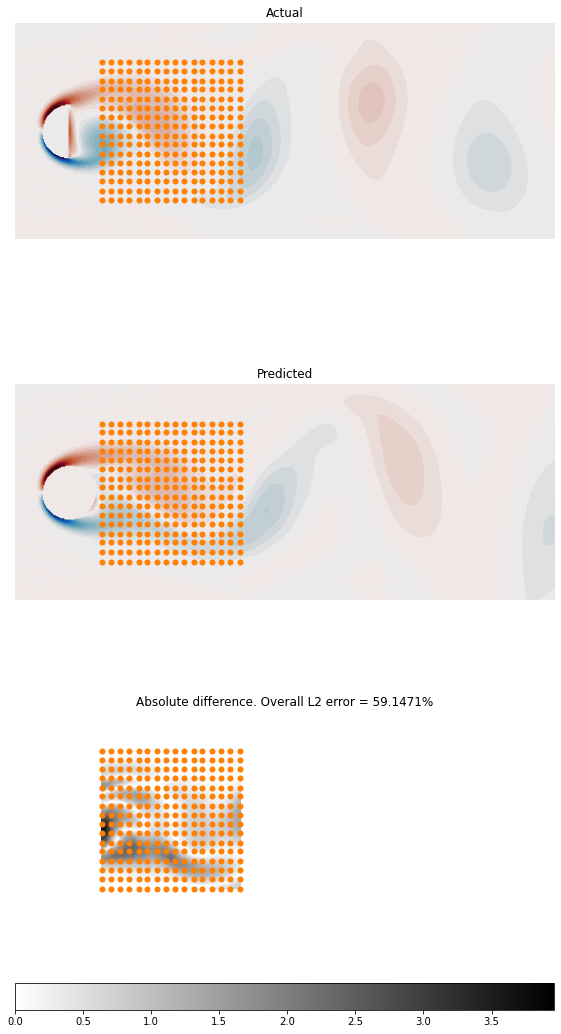

In [32]:
max_error_sample = np.argmax(img_overall_l2_error)

actual_sample = unseen_y[max_error_sample,:,:]
prediction_sample = prediction_inv_scaled[max_error_sample,:,:]
error_sample = img_per_pixel_abs_error[max_error_sample, :, :]
l2_error_sample = img_overall_l2_error[max_error_sample,0]

ygrid = range(n)
xgrid = range(m)
yv, xv = np.meshgrid(ygrid, xgrid)

sensor_locations = sensor_params['pivots']

x_sensors = xv.reshape(1, m*n)[:, sensor_locations]
y_sensors = yv.reshape(1, m*n)[:, sensor_locations]

_, m, n = y_test.shape

x = np.arange(0, m, 1)
y = np.arange(0, n, 1)
mX, mY = np.meshgrid(x, y)
minmax = np.nanmax(np.abs(actual_sample)) * 0.65

# Plotting
fig, axs = plt.subplots(3, facecolor="white",  edgecolor='k', figsize=(7.9,15.5))
# fig.suptitle('Output comparison')

axs[0].imshow(actual_sample.T, cmap=cmocean.cm.balance, interpolation='none', vmin=-minmax, vmax=minmax)
axs[0].contourf(mX, mY, actual_sample.T, 80, cmap=cmocean.cm.balance, alpha=1, vmin=-minmax, vmax=minmax)
axs[0].scatter(x_sensors, y_sensors, marker='.', color='#ff7f00', s=100, zorder=5)
axs[0].set_title('Actual')
axs[0].axis('off')

axs[1].imshow(prediction_sample.T, cmap=cmocean.cm.balance, interpolation='none', vmin=-minmax, vmax=minmax)
axs[1].contourf(mX, mY, prediction_sample.T, 80, cmap=cmocean.cm.balance, alpha=1, vmin=-minmax, vmax=minmax)
axs[1].scatter(x_sensors, y_sensors, marker='.', color='#ff7f00', s=100, zorder=5)
axs[1].set_title('Predicted')          
axs[1].axis('off')

im2 = axs[2].imshow(error_sample.T, cmap='gray_r', interpolation='none', vmin=0, vmax=max_val)
axs[2].set_title(f'Absolute difference. Overall L2 error = {l2_error_sample*100:.4f}%')
axs[2].axis('off')
axs[2].scatter(x_sensors, y_sensors, marker='.', color='#ff7f00', s=100, zorder=5)
fig.colorbar(im2, ax=axs[2], orientation='horizontal')

plt.tight_layout()

plt.show()

In [33]:
mins = []
maxs = []
means = []
for i in range(1,20):
    save_folder_path = f'sensor_types/experiment_{i}'

    config_json = os.path.join(save_folder_path, 'config.json')
    config = json.load(open(config_json))
    sensor_params = config['sensor_parameters']
    scaling_params = config['data_scaling_parameters']
    split_ratio = config['training_parameters']['split_ratio']

    filename = '../data/primitives/cylinder/w_z.npy'
    y = np.load(filename)
    y = y[100:,:,:]
    y = np.transpose(y, (0, 2, 1))
    y_train, y_test, m, n = split_data(y, split_ratio)
    y_train_scaled, y_test_scaled, scaling_params = rescale_data(y_train, y_test, scaling_params=scaling_params)
    y_train_reshaped = reshape_for_ann(y_train_scaled)
    y_test_reshaped = reshape_for_ann(y_test_scaled)
    
    sensor_params['m'] = m
    sensor_params['n'] = n

    sensors, sensor_params = get_sensor_data(y_train_reshaped, sensor_params)
    sensors_test, _ = get_sensor_data(y_test_reshaped, sensor_params)

    sensors = reshape_for_ann(sensors)
    sensors_test = reshape_for_ann(sensors_test)

    unseen_filename = '../data/primitives/diamond_ar_2p0/w_z.npy'
    unseen_y = np.load(unseen_filename)
    unseen_y = unseen_y[100:,:,:]
    unseen_y = np.transpose(unseen_y, (0, 2, 1))
    
    unseen_y_scaled, _, _ = rescale_data(unseen_y, None, scaling_params=scaling_params)
    unseen_y_reshaped = reshape_for_ann(unseen_y_scaled)
    unseen_sensors, _ = get_sensor_data(unseen_y_reshaped, sensor_params)
    unseen_sensors = reshape_for_ann(unseen_sensors)
    
    model = POD(plus=True)
    model.summary()
    sensor_locations = sensor_params['pivots']
    model.fit(
        sensors.reshape(sensors.shape[0],-1),
        y_train.reshape(y_train.shape[0],-1),
        sensor_locations,
        alpha=1e-8
    )
    prediction = model.predict(unseen_sensors.reshape(unseen_sensors.shape[0],-1))

    prediction = prediction.reshape(prediction.shape[0],m,n)
    prediction_inv_scaled = unscale_data(prediction, scaling_params)

    upstream_mask = sensor_params.get('upstream_mask')
    img_per_pixel_abs_error = np.abs(prediction_inv_scaled - unseen_y) * upstream_mask
    img_overall_l2_error = calculate_l2_error_norm(prediction_inv_scaled * upstream_mask, unseen_y * upstream_mask)

    mins.append(img_overall_l2_error.min())
    maxs.append(img_overall_l2_error.max())
    means.append(img_overall_l2_error.mean())

Split data details:
    train_data has 266 examples
    test_data has 134 examples

Scaled data details:
    train_data_rescaled has min: -5.4248, max: 5.4737, mean: -0.0000
    test_data_rescaled has min: -5.4248, max: 5.4741, mean: -0.0007

Scaled data details:
    train_data_rescaled has min: -35.8510, max: 36.6740, mean: -0.0002
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: POD
_________________________________________________________________
Steps            Explanation
SVD              POD decomposition is carried out via singular
                 value decomposition (SVD) - np.linalg.svd(y,0)
_________________________________________________________________
linear_coeff     Solution to the least square problem between
                 actual sensors and decomposed sensors with the
                 minimum L2 norm is solved via the Moore-Penrose
                 pseudo-inverse
_________________________________________________________________
Prediction

Input shape (266, 5)
Output shape (266, 100000)
Split data details:
    train_data has 266 examples
    test_data has 134 examples

Scaled data details:
    train_data_rescaled has min: -5.4248, max: 5.4737, mean: -0.0000
    test_data_rescaled has min: -5.4248, max: 5.4741, mean: -0.0007

Physically:
        Distance from obstacle rear: 0.1 unit lengths
        Total line length: 2.0 unit lengths
        Sensor separation: 0.5 unit lengths
        
Scaled data details:
    train_data_rescaled has min: -35.8510, max: 36.6740, mean: -0.0002
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: POD
_________________________________________________________________
Steps            Explanation
SVD              POD decomposition is carried out via singular
                 value decomposition (SVD) - np.linalg.svd(y,0)
_________________________________________________________________
linear_coeff     Solution to the least square problem between
                 actual se

Physically:
        Distance from obstacle rear: 0.1 unit lengths
        Total sensor count: 7
        Spanwise:
            Total line length: 2.0 unit lengths
            Sensor separation: 1.0 unit lengths
        Streamwise:
            Total line length: 2.0 unit lengths
            Sensor separation: 0.5 unit lengths
        
Scaled data details:
    train_data_rescaled has min: -35.8510, max: 36.6740, mean: -0.0002
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: POD
_________________________________________________________________
Steps            Explanation
SVD              POD decomposition is carried out via singular
                 value decomposition (SVD) - np.linalg.svd(y,0)
_________________________________________________________________
linear_coeff     Solution to the least square problem between
                 actual sensors and decomposed sensors with the
                 minimum L2 norm is solved via the Moore-Penrose
                

Split data details:
    train_data has 266 examples
    test_data has 134 examples

Scaled data details:
    train_data_rescaled has min: -5.4248, max: 5.4737, mean: -0.0000
    test_data_rescaled has min: -5.4248, max: 5.4741, mean: -0.0007

Scaled data details:
    train_data_rescaled has min: -35.8510, max: 36.6740, mean: -0.0002
    test_data_rescaled has min: 0.0000, max: 0.0000, mean: 0.0000

Model: POD
_________________________________________________________________
Steps            Explanation
SVD              POD decomposition is carried out via singular
                 value decomposition (SVD) - np.linalg.svd(y,0)
_________________________________________________________________
linear_coeff     Solution to the least square problem between
                 actual sensors and decomposed sensors with the
                 minimum L2 norm is solved via the Moore-Penrose
                 pseudo-inverse
_________________________________________________________________
Prediction

In [34]:
for i in range(len(mins)):
    print(f'& {mins[i]*100:.2f}\% & {maxs[i]*100:.2f}\% & {means[i]*100:.2f}\% \\\\')

& 100.04\% & 100.04\% & 100.04\% \\
& 100.27\% & 100.27\% & 100.27\% \\
& 101.19\% & 101.19\% & 101.19\% \\
& 100.76\% & 100.76\% & 100.76\% \\
& 102.05\% & 102.05\% & 102.05\% \\
& 98.56\% & 98.56\% & 98.56\% \\
& 93.99\% & 93.99\% & 93.99\% \\
& 97.24\% & 97.24\% & 97.24\% \\
& 96.45\% & 96.46\% & 96.46\% \\
& 100.26\% & 100.26\% & 100.26\% \\
& 100.60\% & 100.60\% & 100.60\% \\
& 100.39\% & 100.39\% & 100.39\% \\
& 101.19\% & 101.19\% & 101.19\% \\
& 100.53\% & 100.53\% & 100.53\% \\
& 100.02\% & 100.02\% & 100.02\% \\
& 100.00\% & 100.00\% & 100.00\% \\
& 99.99\% & 99.99\% & 99.99\% \\
& 99.99\% & 99.99\% & 99.99\% \\
& 97.25\% & 97.25\% & 97.25\% \\
